# **News Processing (radarjatim.id)**

***Read Data***

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aulyamiftahkhulhikmah/Dataset/main/radarjatim_hukumKriminal.csv')
df

,Judul,Content,Category
0,"Laporan Dugaan Proyek Fiktif di IMS, Polda Jat...",SURABAYA (RadarJatim.id) Polda Jatim bekerja e...,Hukum dan Kriminal
1,"Lakukan Penipuan Lewat Online Shop, Warga Suko...",SIDOARJO (RadarJatim.id) – Jaksa Penuntut Umum...,Hukum dan Kriminal
2,Erick Thohir Kerja Cepat Bereskan Kasus Penyel...,JAKARTA (RadarJatim.id) Menteri BUMN Erick Tho...,Hukum dan Kriminal
3,Bupati bersama Forkopimda Musnahkan Barang Buk...,SIDOARJO (RadarJatim.id) — Kejaksaan Negeri (K...,Hukum dan Kriminal
4,"Merasa Dirugikan, Kuasa Hukum Sudarsono Lapork...","BANYUWANGI (RadarJatim.id)--Sudarsono, warga D...",Ekonomi Bisnis
...,...,...,...
95,Menunggu Ending Kasus Penistaan Agama Bermodus...,Catatan Pinggiran SUHARTOKO Sempat membuat heb...,Hukum dan Kriminal
96,"Terima Pengaduan Status Tanah, Wawali Armuji G...",SURABAYA (RadarJatim.id) Wakil Wali Kota Surab...,Hukum dan Kriminal
97,Hunian Rutan Surabaya Meningkat Hingga 150 Persen,SIDOARJO (RadarJatim.id) – Penataan ulang Ruta...,Hukum dan Kriminal
98,KPK Lelang 14 Barang Eks Gratifikasi di Road t...,SURABAYA (RadarJatim.id) Komisi Pemberantasan ...,Hukum dan Kriminal


***Cek Jumlah Category***

In [ ]:
# Hitung jumlah kelas
kelas = df['Category'].value_counts()
kelas

Hukum dan Kriminal    98
Ekonomi Bisnis         1
HAM                    1
Name: Category, dtype: int64

***Cek Missing Value***

In [ ]:
df.isnull().sum()

Judul       0
Content     0
Category    0
dtype: int64

***Cek Duplikasi Kalimat***

In [ ]:
df.duplicated().sum()

0

***Preprocessing***

***Cleansing Data***

In [ ]:
import re
df['Clean_Content'] = df['Content'].str.replace(r'[^\w\s,.?!]', '', regex=True).str.lower()
df

,Judul,Content,Category,Clean_Content
0,"Laporan Dugaan Proyek Fiktif di IMS, Polda Jat...",SURABAYA (RadarJatim.id) Polda Jatim bekerja e...,Hukum dan Kriminal,surabaya radarjatim.id polda jatim bekerja ekt...
1,"Lakukan Penipuan Lewat Online Shop, Warga Suko...",SIDOARJO (RadarJatim.id) – Jaksa Penuntut Umum...,Hukum dan Kriminal,sidoarjo radarjatim.id jaksa penuntut umum jp...
2,Erick Thohir Kerja Cepat Bereskan Kasus Penyel...,JAKARTA (RadarJatim.id) Menteri BUMN Erick Tho...,Hukum dan Kriminal,jakarta radarjatim.id menteri bumn erick thohi...
3,Bupati bersama Forkopimda Musnahkan Barang Buk...,SIDOARJO (RadarJatim.id) — Kejaksaan Negeri (K...,Hukum dan Kriminal,sidoarjo radarjatim.id kejaksaan negeri kejar...
4,"Merasa Dirugikan, Kuasa Hukum Sudarsono Lapork...","BANYUWANGI (RadarJatim.id)--Sudarsono, warga D...",Ekonomi Bisnis,"banyuwangi radarjatim.idsudarsono, warga desa ..."
...,...,...,...,...
95,Menunggu Ending Kasus Penistaan Agama Bermodus...,Catatan Pinggiran SUHARTOKO Sempat membuat heb...,Hukum dan Kriminal,catatan pinggiran suhartoko sempat membuat heb...
96,"Terima Pengaduan Status Tanah, Wawali Armuji G...",SURABAYA (RadarJatim.id) Wakil Wali Kota Surab...,Hukum dan Kriminal,surabaya radarjatim.id wakil wali kota surabay...
97,Hunian Rutan Surabaya Meningkat Hingga 150 Persen,SIDOARJO (RadarJatim.id) – Penataan ulang Ruta...,Hukum dan Kriminal,sidoarjo radarjatim.id penataan ulang rutan i...
98,KPK Lelang 14 Barang Eks Gratifikasi di Road t...,SURABAYA (RadarJatim.id) Komisi Pemberantasan ...,Hukum dan Kriminal,surabaya radarjatim.id komisi pemberantasan ko...


***Tokenizing***

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df["Tokenizing"] = df['Clean_Content'].apply(sent_tokenize)
df

,Judul,Content,Category,Clean_Content,Tokenizing
0,"Laporan Dugaan Proyek Fiktif di IMS, Polda Jat...",SURABAYA (RadarJatim.id) Polda Jatim bekerja e...,Hukum dan Kriminal,surabaya radarjatim.id polda jatim bekerja ekt...,[surabaya radarjatim.id polda jatim bekerja ek...
1,"Lakukan Penipuan Lewat Online Shop, Warga Suko...",SIDOARJO (RadarJatim.id) – Jaksa Penuntut Umum...,Hukum dan Kriminal,sidoarjo radarjatim.id jaksa penuntut umum jp...,[sidoarjo radarjatim.id jaksa penuntut umum j...
2,Erick Thohir Kerja Cepat Bereskan Kasus Penyel...,JAKARTA (RadarJatim.id) Menteri BUMN Erick Tho...,Hukum dan Kriminal,jakarta radarjatim.id menteri bumn erick thohi...,[jakarta radarjatim.id menteri bumn erick thoh...
3,Bupati bersama Forkopimda Musnahkan Barang Buk...,SIDOARJO (RadarJatim.id) — Kejaksaan Negeri (K...,Hukum dan Kriminal,sidoarjo radarjatim.id kejaksaan negeri kejar...,[sidoarjo radarjatim.id kejaksaan negeri keja...
4,"Merasa Dirugikan, Kuasa Hukum Sudarsono Lapork...","BANYUWANGI (RadarJatim.id)--Sudarsono, warga D...",Ekonomi Bisnis,"banyuwangi radarjatim.idsudarsono, warga desa ...","[banyuwangi radarjatim.idsudarsono, warga desa..."
...,...,...,...,...,...
95,Menunggu Ending Kasus Penistaan Agama Bermodus...,Catatan Pinggiran SUHARTOKO Sempat membuat heb...,Hukum dan Kriminal,catatan pinggiran suhartoko sempat membuat heb...,[catatan pinggiran suhartoko sempat membuat he...
96,"Terima Pengaduan Status Tanah, Wawali Armuji G...",SURABAYA (RadarJatim.id) Wakil Wali Kota Surab...,Hukum dan Kriminal,surabaya radarjatim.id wakil wali kota surabay...,[surabaya radarjatim.id wakil wali kota suraba...
97,Hunian Rutan Surabaya Meningkat Hingga 150 Persen,SIDOARJO (RadarJatim.id) – Penataan ulang Ruta...,Hukum dan Kriminal,sidoarjo radarjatim.id penataan ulang rutan i...,[sidoarjo radarjatim.id penataan ulang rutan ...
98,KPK Lelang 14 Barang Eks Gratifikasi di Road t...,SURABAYA (RadarJatim.id) Komisi Pemberantasan ...,Hukum dan Kriminal,surabaya radarjatim.id komisi pemberantasan ko...,[surabaya radarjatim.id komisi pemberantasan k...


***TF-IDF***

In [ ]:
# Inisialisasi TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_results = []
set_len_doc = df['Tokenizing'][:]
for i in range(len(set_len_doc)): #perulangan setiap artikel/dokumen

  tfidf_vectorizer = TfidfVectorizer()  #inisialisasi tfidf
  tfidf_matrix = tfidf_vectorizer.fit_transform(df['Tokenizing'][i]) #menjadikan tfidf setiap dokumen
  tfidf_results.append(tfidf_matrix) #memasukkan hasil matrix tfidf ke tfidf_results

In [ ]:
# Menampilkan data TFIDF
for idoc in range(len(tfidf_results)):
  print(f'========== Document ke-{idoc} ==========')

  arr_tfidf_results = tfidf_results[idoc].toarray() #menjadikan hasil tfidf yang format sparesematrix menjadi array

  index = 0
  for hasils in arr_tfidf_results:
    print(f'Hasil Tfidf Kalimat ke-{index+1} = {list(hasils)}')
    index+=1
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

***Cosine Similarity***

> Cosine similarity adalah sebuah metrik yang digunakan untuk mengukur sejauh mana kemiripan antara dua vektor non-nol dalam ruang berdimensi banyak.



In [ ]:
# Import Library
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.shortest_paths import weighted

In [ ]:
cos_sim_result = [] #untuk menyimpan hasil cosine sim akhir
graf_result = [] #untuk menyimpan hasil graf akhir
treshold = 0.08 #inisialisasi treshold

for i_doc in range(len(tfidf_results)):
  # print(f'========= Document ke-{i_doc} ==========')

  cos_sim_now = []
  graf_now = nx.DiGraph()
  cos_sim = cosine_similarity(tfidf_results[i_doc]) #menjadikan tfidf ke cosine

  for i_hasil in range(len(cos_sim)): #inisialisasi indeks awal perulangan dari setiap hasil cosine
    arr_cosim = []

    for j_hasil in range(i_hasil+1,len(cos_sim)): #inisialisasi indeks kedua perulangan dari setiap hasil cosine
      if cos_sim[i_hasil][j_hasil] > treshold: #cek apakah cosim dari kalimat 1 dan 2 lebih dari treshold?
        # print(f'Similairty kalimat ke - {i_hasil} : {j_hasil} = {cos_sim[i_hasil][j_hasil]}')

        arr_cosim.append([i_hasil,j_hasil,cos_sim[i_hasil][j_hasil]]) #menyimpan nilai indeks awal, indeks awal+1, hasil cosim
        graf_now.add_edge(i_hasil,j_hasil,weight=cos_sim[i_hasil][j_hasil]) #menyimpan nilai indeks awal, indeks awal+1, bobot=hasil cosim

    cos_sim_now.append(arr_cosim)
    # graf_now.append(graf_current)
  cos_sim_result.append(cos_sim_now)
  graf_result.append(graf_now)
  # print('\n')

In [ ]:
# menampilkan hasil cosine simmilarity
for i in range(len(cos_sim_result)):
  print(f'============= Document ke - {i} ==============')
  for j in range(len(cos_sim_result[i])):
    for idx1,idx2,hasil in cos_sim_result[i][j]:
      print(f'Cosine Similarity Kalimat {idx1} : {idx2} = {hasil}')
  print('\n')

Streaming output truncated to the last 5000 lines.
Cosine Similarity Kalimat 21 : 22 = 0.17105046011693203
Cosine Similarity Kalimat 21 : 23 = 0.17986480770151975
Cosine Similarity Kalimat 21 : 24 = 0.0884003393190218
Cosine Similarity Kalimat 21 : 25 = 0.15104574354334863
Cosine Similarity Kalimat 21 : 26 = 0.19839930940594033
Cosine Similarity Kalimat 21 : 28 = 0.11767246494910079
Cosine Similarity Kalimat 21 : 31 = 0.08647302497034787
Cosine Similarity Kalimat 22 : 23 = 0.17523403347003164
Cosine Similarity Kalimat 22 : 24 = 0.13854401284865325
Cosine Similarity Kalimat 22 : 26 = 0.16198937049525408
Cosine Similarity Kalimat 22 : 31 = 0.16709422461820184
Cosine Similarity Kalimat 22 : 32 = 0.16999159524877788
Cosine Similarity Kalimat 23 : 25 = 0.13540623167656882
Cosine Similarity Kalimat 23 : 26 = 0.27029325141673377
Cosine Similarity Kalimat 23 : 27 = 0.1367030850234691
Cosine Similarity Kalimat 23 : 31 = 0.1351258802073349
Cosine Similarity Kalimat 23 : 32 = 0.09879181241807795


***Closenens Centrality***

> Merupakan salah satu ukuran centralitas dalam jaringan yang mengukur seberapa dekat suatu simpul (node) dalam jaringan terhadap simpul-simpul lainnya. Hal ini mengukur seberapa cepat atau seberapa mudah sebuah simpul dapat diakses oleh simpul lain dalam jaringan.



In [ ]:
# Cuma cek Hitung closeness centrality pada index 0
closeness_centrality = nx.closeness_centrality(graf_result[0])
closeness_centrality

{0: 0.0,
 1: 0.041666666666666664,
 3: 0.041666666666666664,
 4: 0.125,
 6: 0.16666666666666666,
 7: 0.25,
 16: 0.4298245614035088,
 17: 0.40760869565217395,
 18: 0.3950617283950617,
 20: 0.1856060606060606,
 21: 0.34404761904761905,
 15: 0.375,
 2: 0.0,
 9: 0.11538461538461539,
 10: 0.1875,
 12: 0.2604166666666667,
 13: 0.2800925925925926,
 19: 0.3648989898989899,
 24: 0.4083333333333333,
 11: 0.2596153846153846,
 5: 0.09523809523809523,
 14: 0.17013888888888892,
 22: 0.41782407407407407,
 8: 0.0,
 23: 0.3214285714285714}

In [ ]:
for i in range(len(graf_result)):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  # ========= menampilkan graf ===========

  # pos = nx.spring_layout(graf_result[i])  ## Menentukan posisi/koordinat simpul
  # labels = nx.get_edge_attributes(graf_result[i], 'weight') ##mendapatkan atribut berbobot ('weight') dari setiap sisi dalam graf.

  # # Menentukan ukuran canvas
  # plt.figure(figsize=(30, 20))

  # # Menggambar graf dengan ukuran canvas yang diperbesar
  # nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  # nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  # # plt.show()


  print('\n')

========= document ke-0 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.041666666666666664
Closenes Centrality Node 3 = 0.041666666666666664
Closenes Centrality Node 4 = 0.125
Closenes Centrality Node 6 = 0.16666666666666666
Closenes Centrality Node 7 = 0.25
Closenes Centrality Node 16 = 0.4298245614035088
Closenes Centrality Node 17 = 0.40760869565217395
Closenes Centrality Node 18 = 0.3950617283950617
Closenes Centrality Node 20 = 0.1856060606060606
Closenes Centrality Node 21 = 0.34404761904761905
Closenes Centrality Node 15 = 0.375
Closenes Centrality Node 2 = 0.0
Closenes Centrality Node 9 = 0.11538461538461539
Closenes Centrality Node 10 = 0.1875
Closenes Centrality Node 12 = 0.2604166666666667
Closenes Centrality Node 13 = 0.2800925925925926
Closenes Centrality Node 19 = 0.3648989898989899
Closenes Centrality Node 24 = 0.4083333333333333
Closenes Centrality Node 11 = 0.2596153846153846
Closenes Centrality Node 5 = 0.09523809523809523
Closenes Cent

========= document ke-0 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.041666666666666664
Closenes Centrality Node 3 = 0.041666666666666664
Closenes Centrality Node 4 = 0.125
Closenes Centrality Node 6 = 0.16666666666666666
Closenes Centrality Node 7 = 0.25
Closenes Centrality Node 16 = 0.4298245614035088
Closenes Centrality Node 17 = 0.40760869565217395
Closenes Centrality Node 18 = 0.3950617283950617
Closenes Centrality Node 20 = 0.1856060606060606
Closenes Centrality Node 21 = 0.34404761904761905
Closenes Centrality Node 15 = 0.375
Closenes Centrality Node 2 = 0.0
Closenes Centrality Node 9 = 0.11538461538461539
Closenes Centrality Node 10 = 0.1875
Closenes Centrality Node 12 = 0.2604166666666667
Closenes Centrality Node 13 = 0.2800925925925926
Closenes Centrality Node 19 = 0.3648989898989899
Closenes Centrality Node 24 = 0.4083333333333333
Closenes Centrality Node 11 = 0.2596153846153846
Closenes Centrality Node 5 = 0.09523809523809523
Closenes Cent

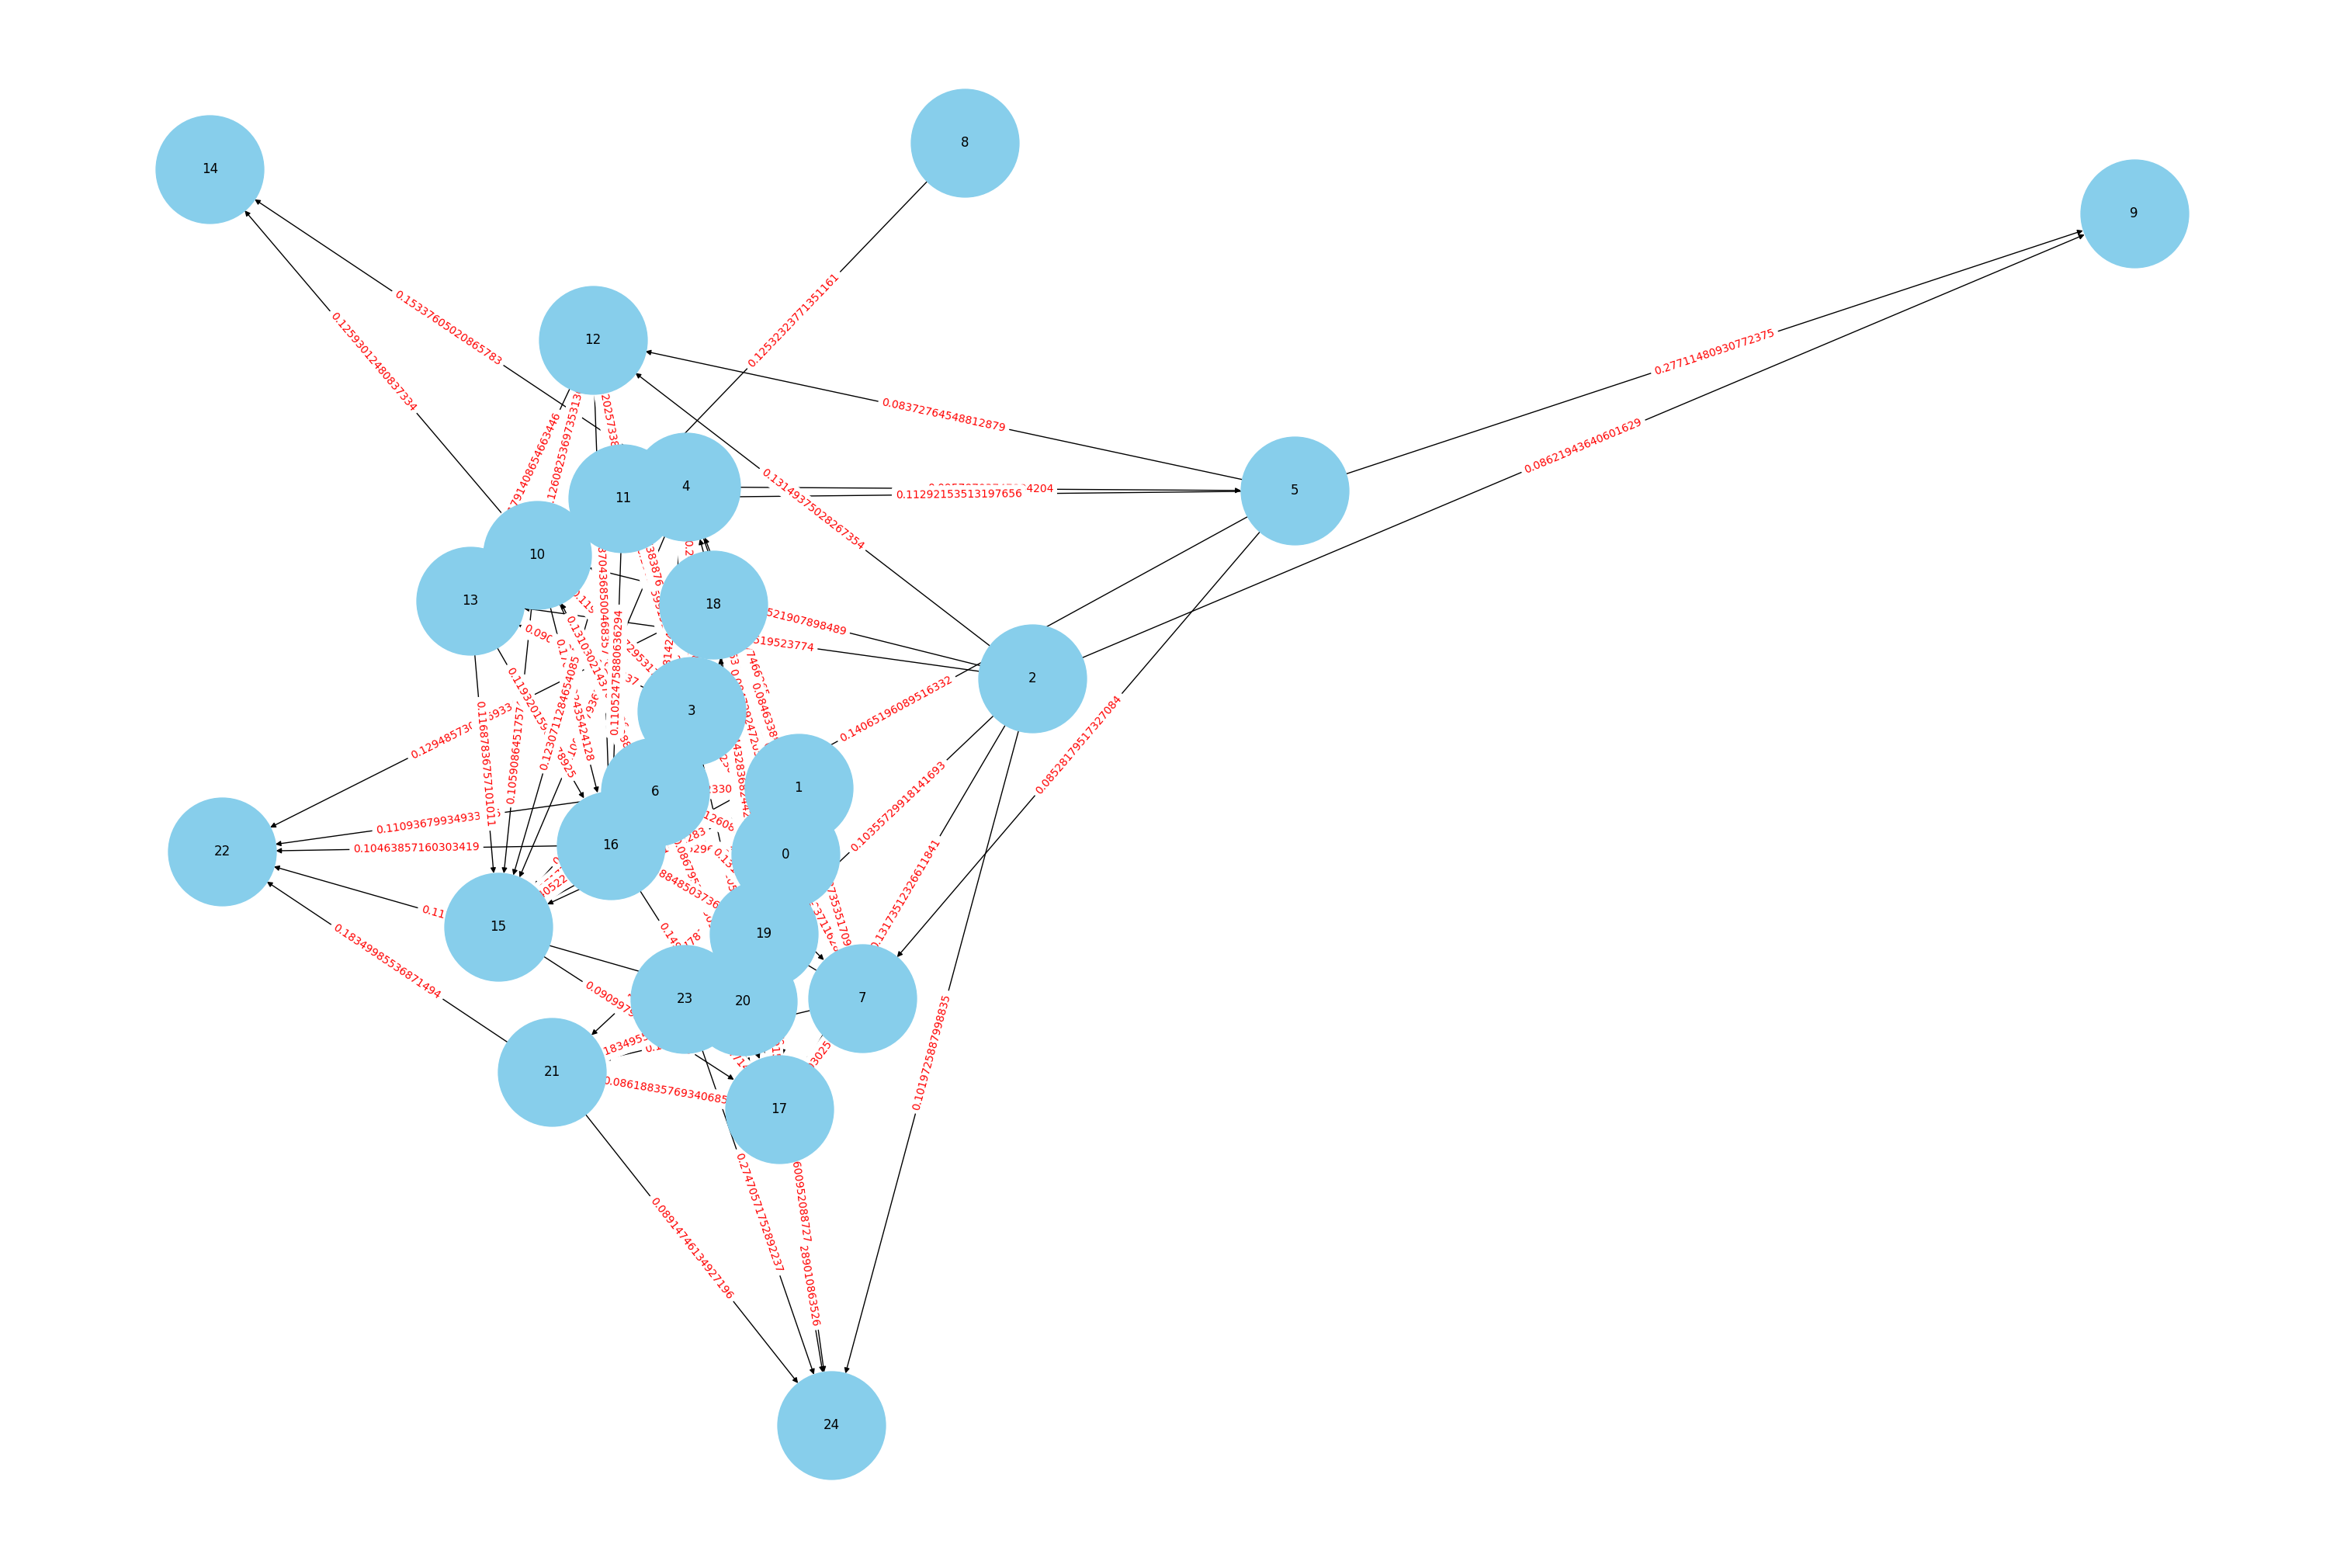



========= document ke-1 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.07142857142857142
Closenes Centrality Node 3 = 0.21428571428571427
Closenes Centrality Node 9 = 0.38571428571428573
Closenes Centrality Node 5 = 0.25510204081632654
Closenes Centrality Node 14 = 0.5413533834586466
Closenes Centrality Node 2 = 0.0
Closenes Centrality Node 4 = 0.19047619047619047
Closenes Centrality Node 10 = 0.5102040816326531
Closenes Centrality Node 12 = 0.07142857142857142
Closenes Centrality Node 8 = 0.38095238095238093
Closenes Centrality Node 6 = 0.23376623376623373
Closenes Centrality Node 7 = 0.2916666666666667
Closenes Centrality Node 11 = 0.4548872180451128
Closenes Centrality Node 13 = 0.4548872180451128


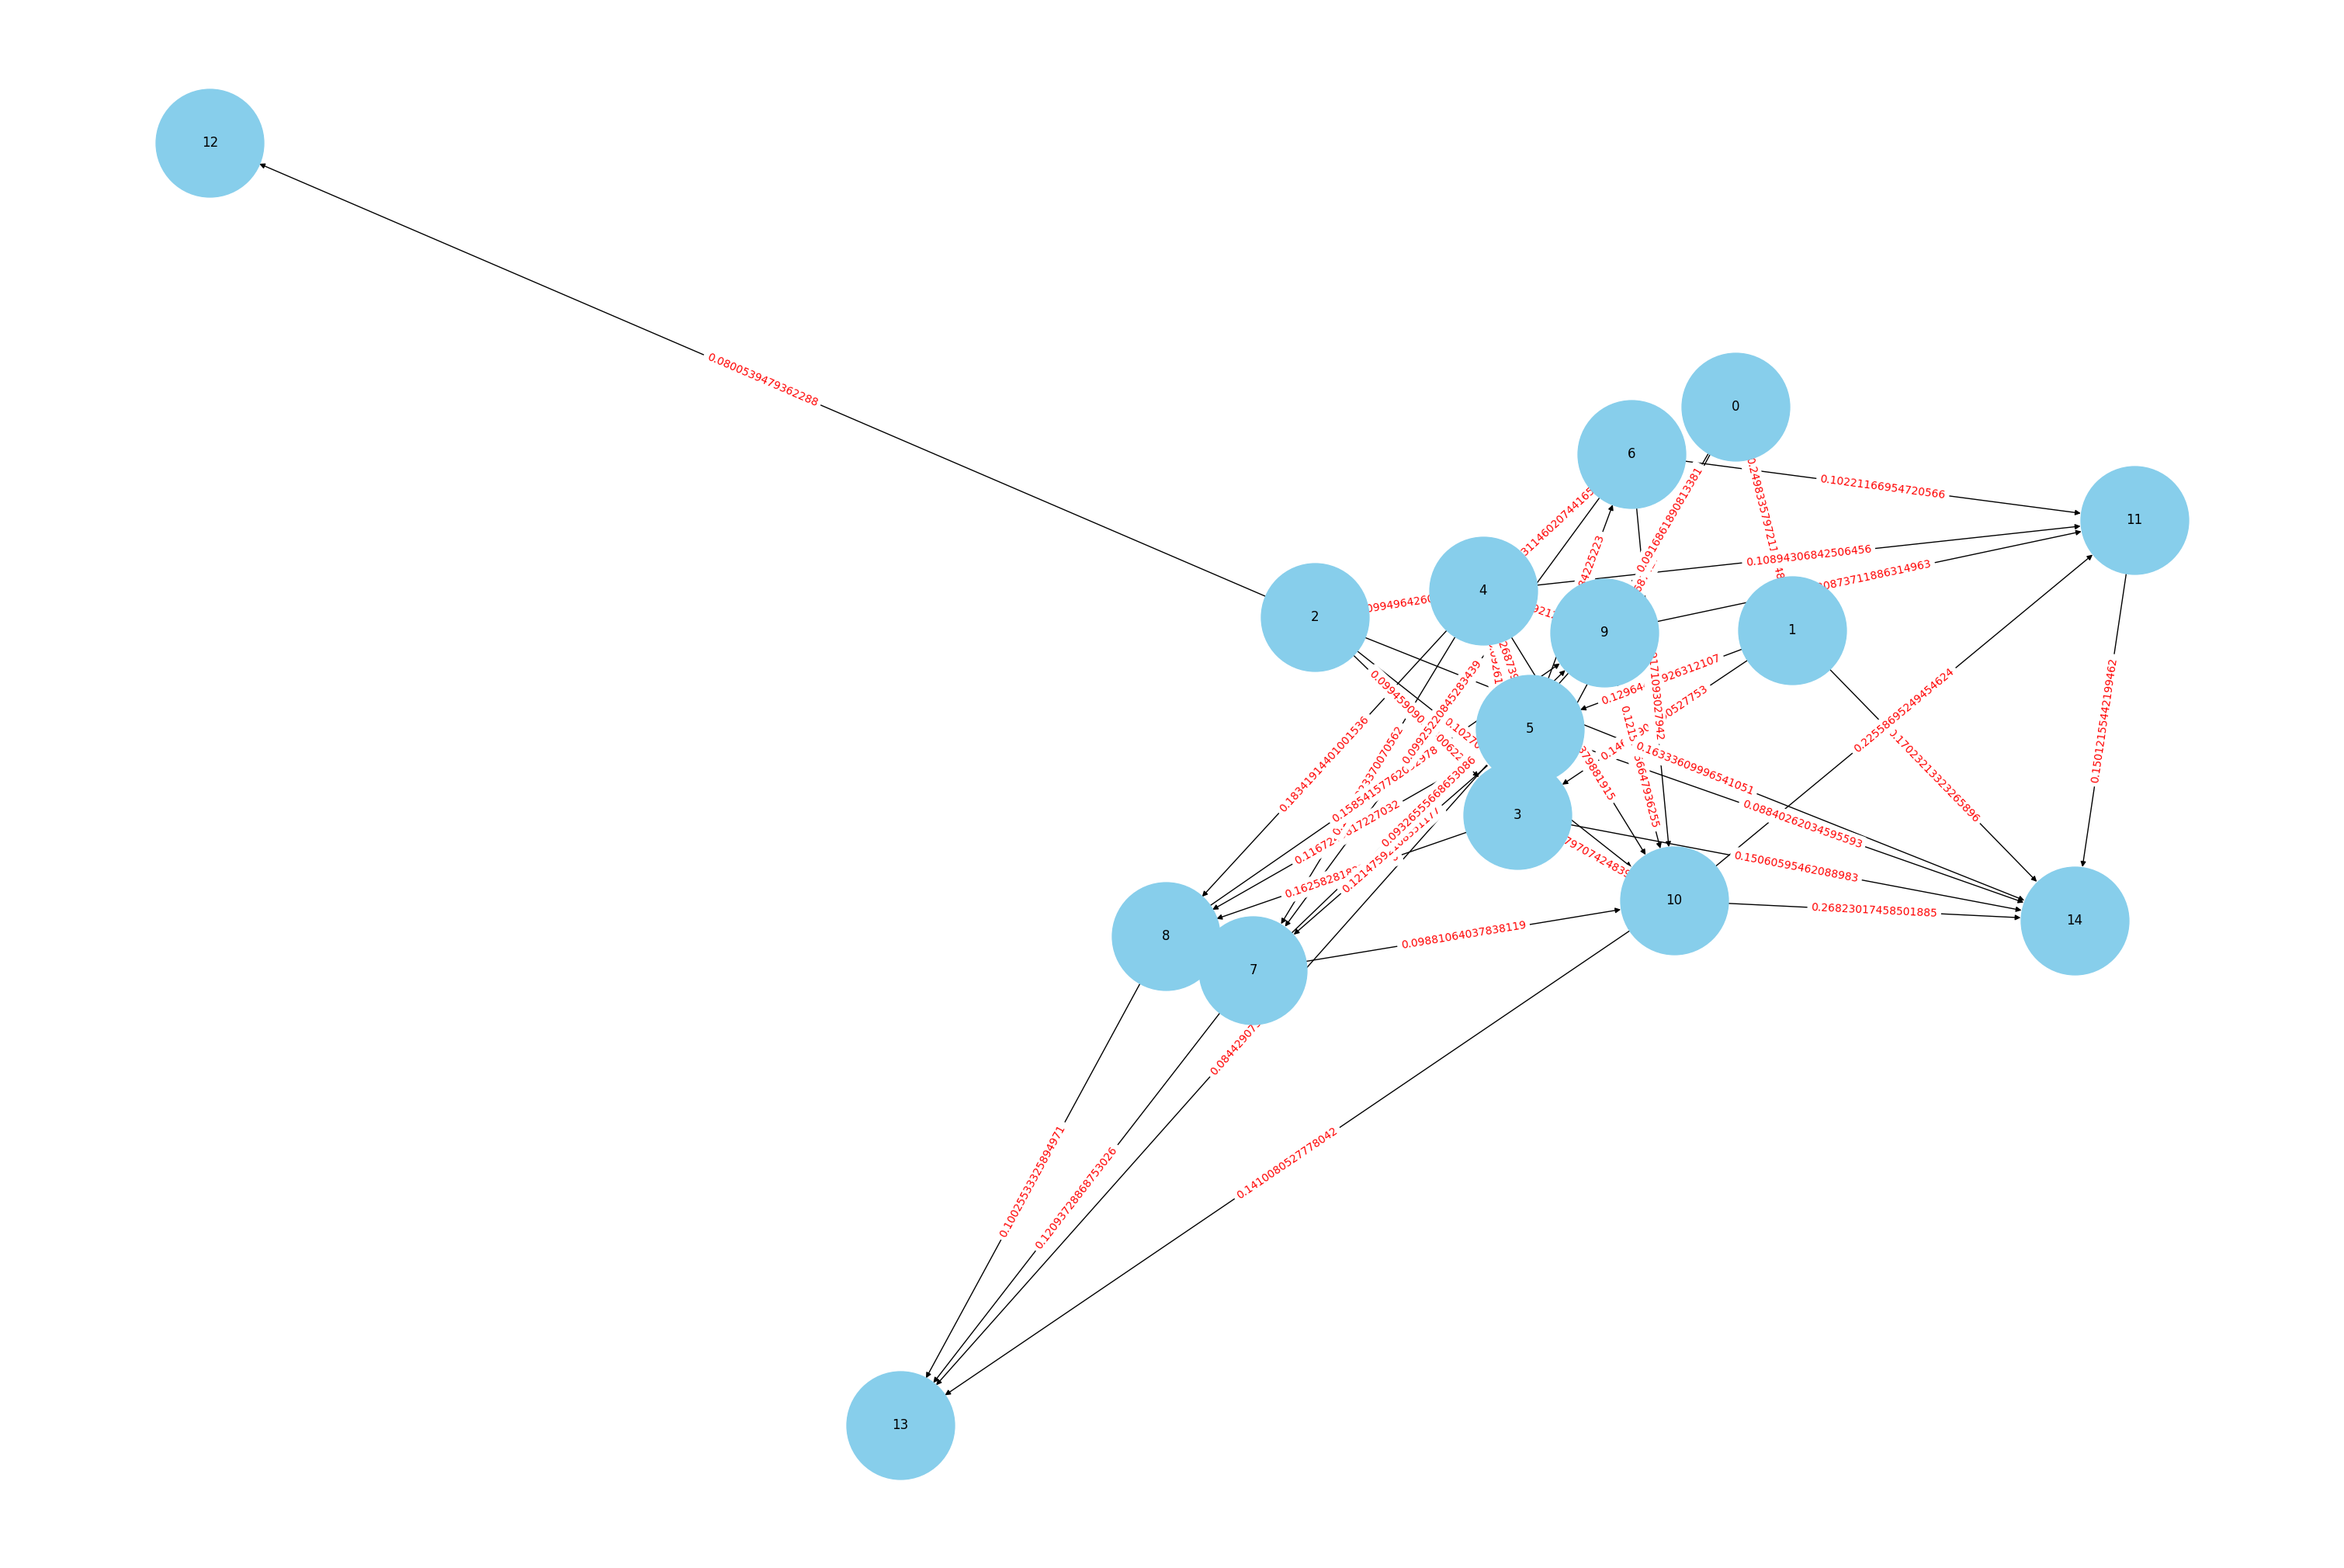



========= document ke-2 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.09090909090909091
Closenes Centrality Node 3 = 0.18181818181818182
Closenes Centrality Node 5 = 0.20454545454545453
Closenes Centrality Node 6 = 0.09090909090909091
Closenes Centrality Node 7 = 0.46753246753246747
Closenes Centrality Node 8 = 0.29090909090909095
Closenes Centrality Node 12 = 0.606060606060606
Closenes Centrality Node 11 = 0.48484848484848486
Closenes Centrality Node 2 = 0.0
Closenes Centrality Node 4 = 0.0
Closenes Centrality Node 9 = 0.29752066115702475


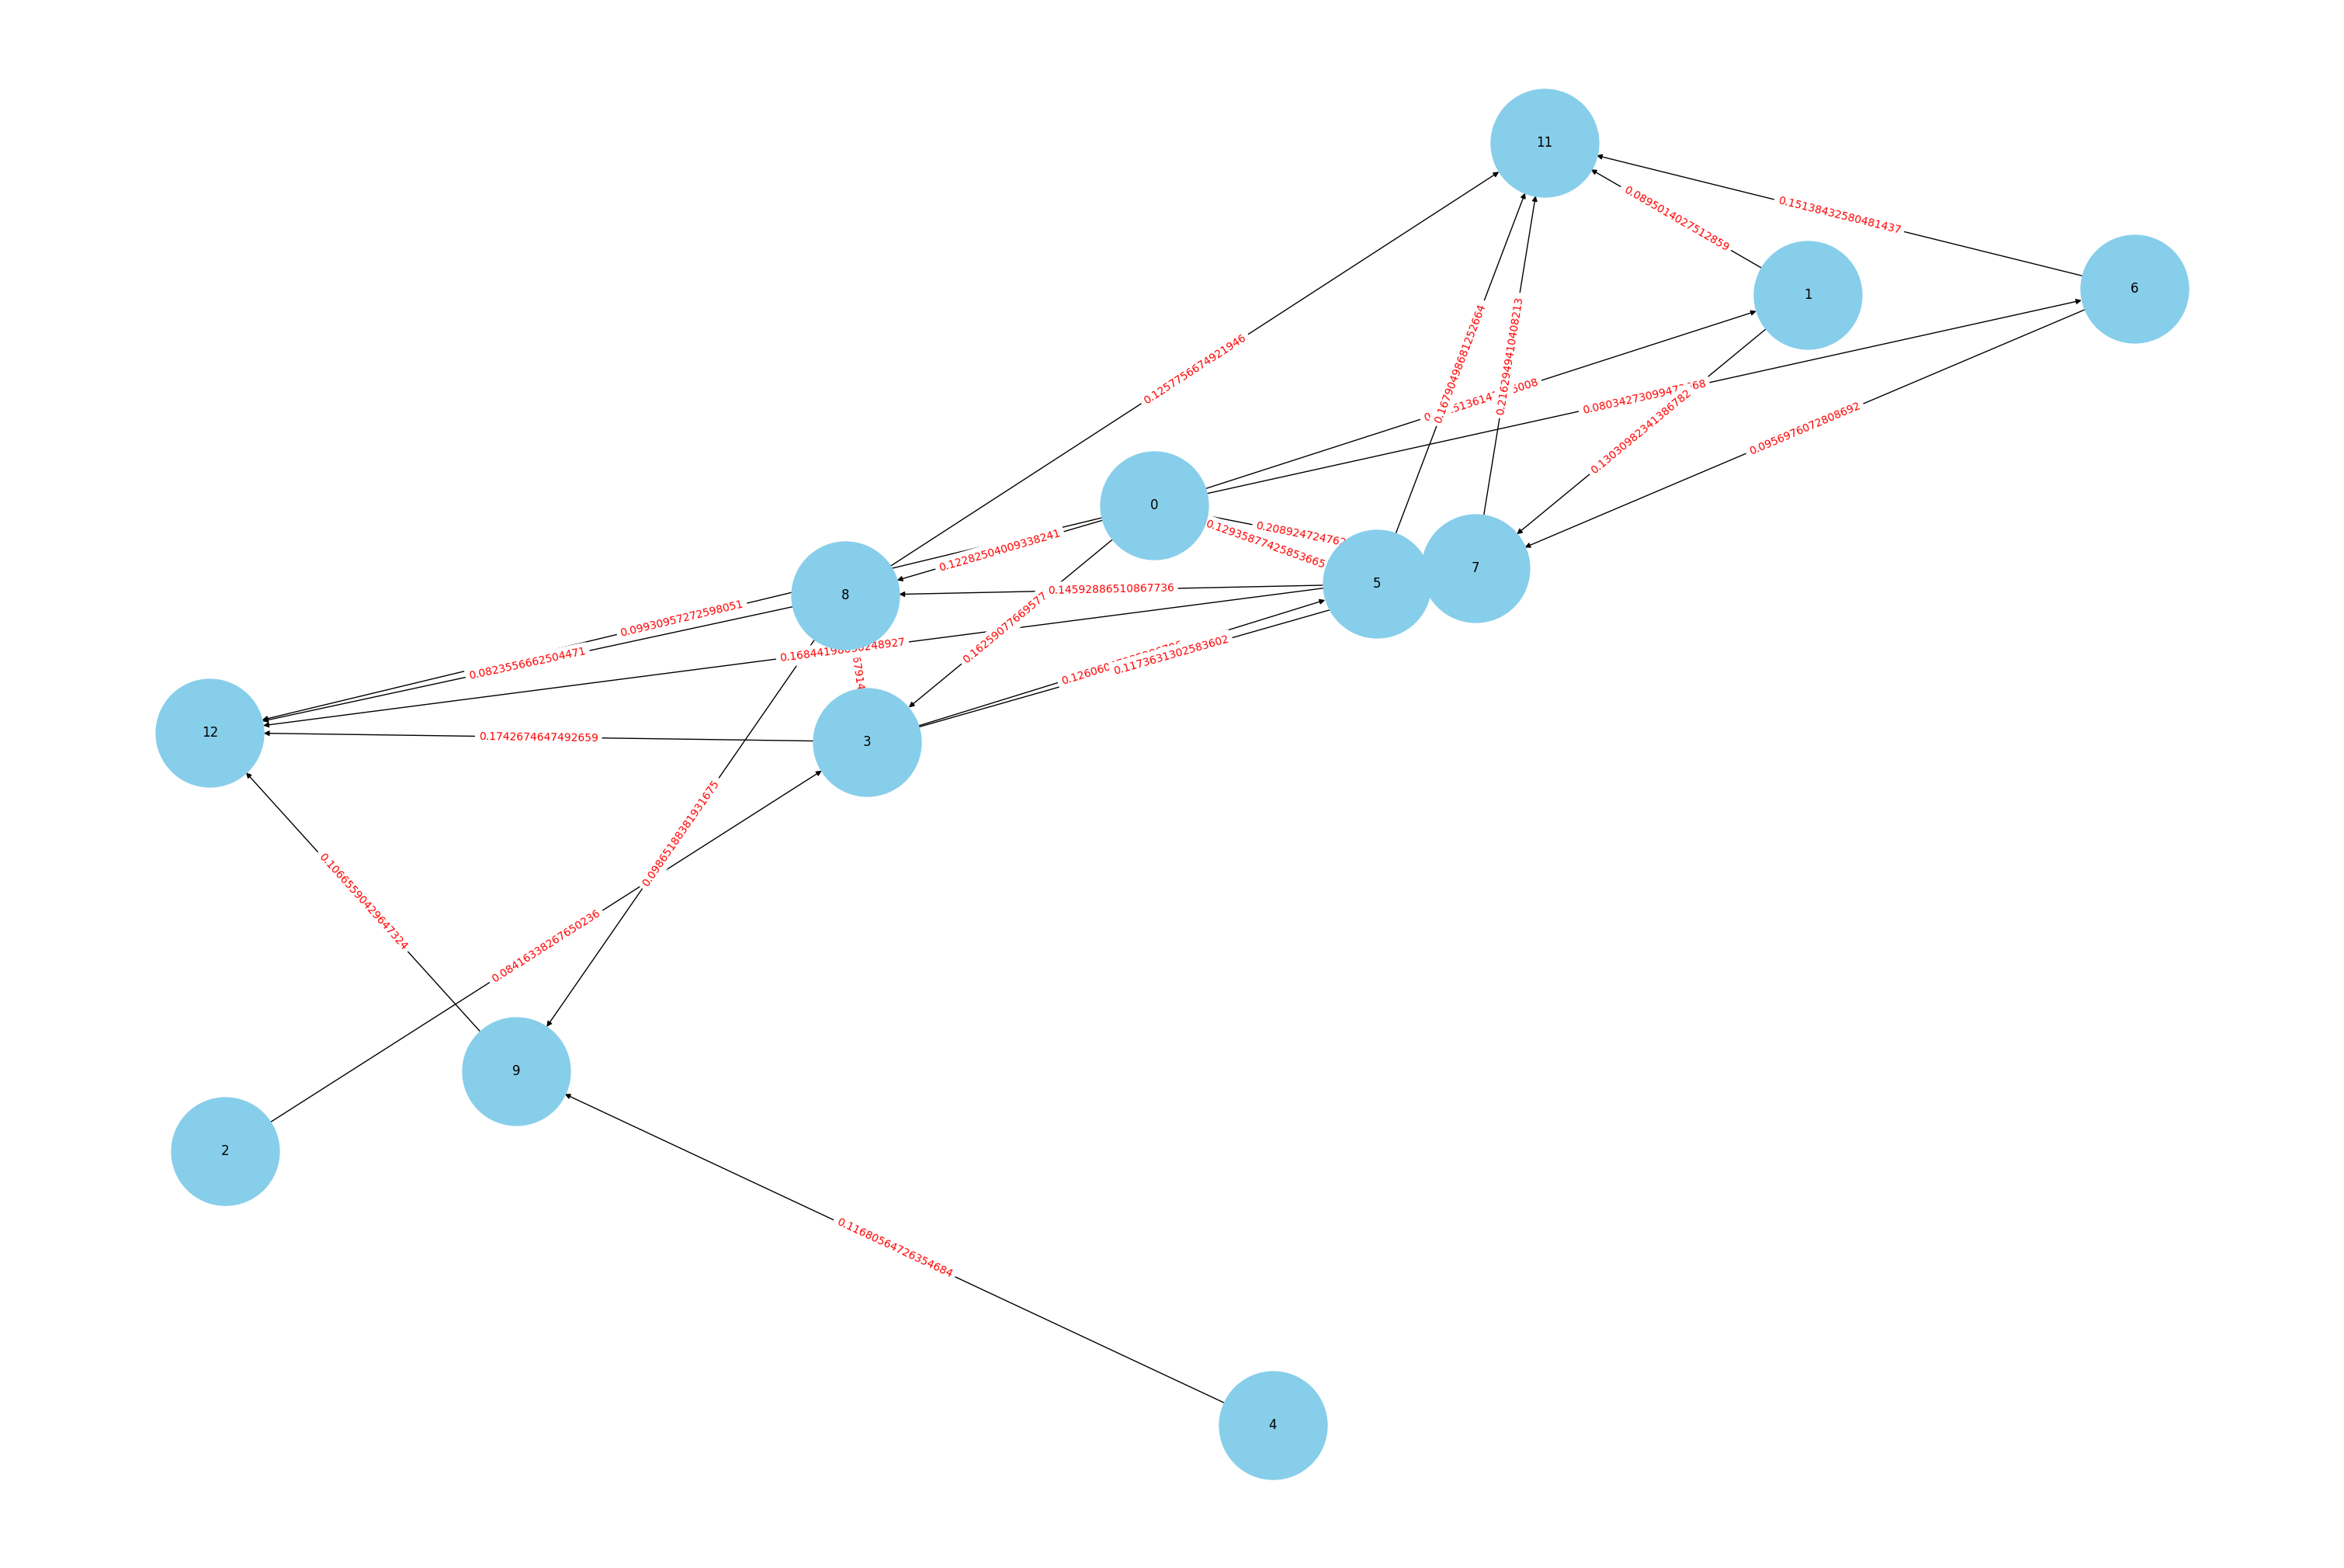



========= document ke-3 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.1
Closenes Centrality Node 3 = 0.22499999999999998
Closenes Centrality Node 5 = 0.1
Closenes Centrality Node 7 = 0.4
Closenes Centrality Node 8 = 0.3125
Closenes Centrality Node 2 = 0.13333333333333333
Closenes Centrality Node 4 = 0.26666666666666666
Closenes Centrality Node 6 = 0.2
Closenes Centrality Node 10 = 0.4266666666666667
Closenes Centrality Node 9 = 0.0


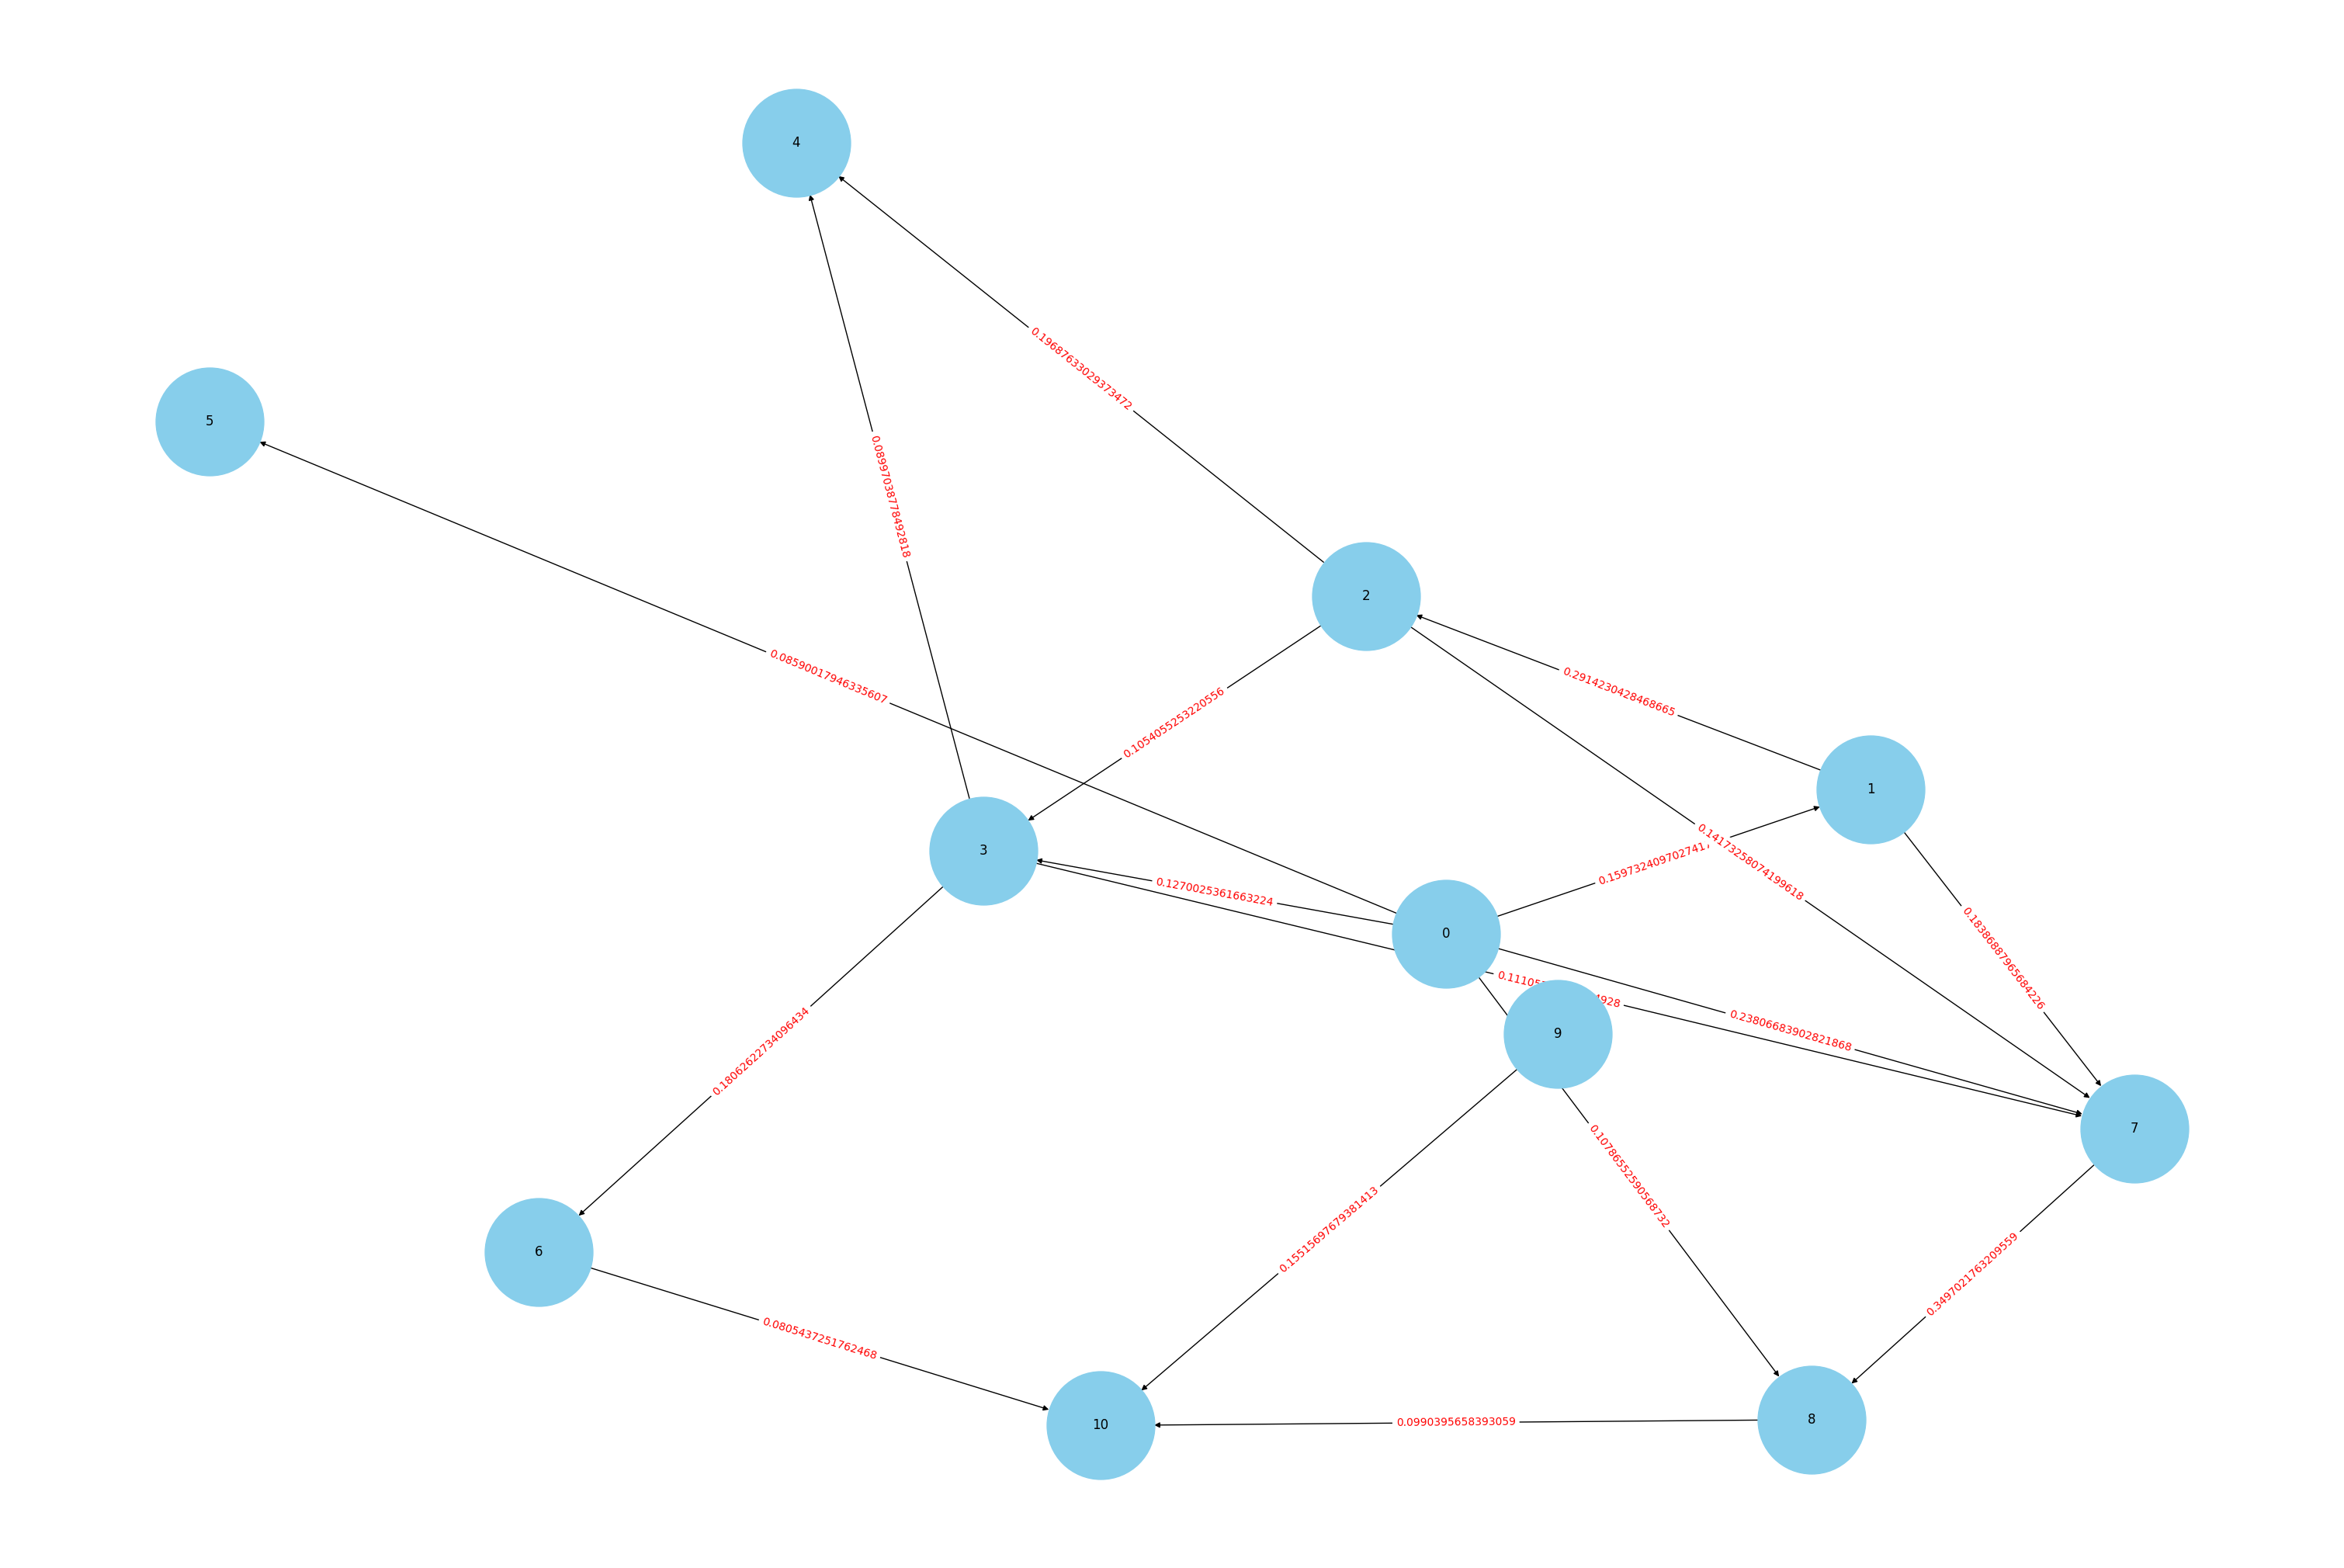

In [ ]:
for i in range(len(graf_result[:4])):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  # ========= menampilkan graf ===========

  pos = nx.spring_layout(graf_result[i])  ## Menentukan posisi/koordinat simpul
  labels = nx.get_edge_attributes(graf_result[i], 'weight') ##mendapatkan atribut berbobot ('weight') dari setiap sisi dalam graf.

  # Menentukan ukuran canvas
  plt.figure(figsize=(30, 20))

  # Menggambar graf dengan ukuran canvas yang diperbesar
  nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  plt.show()


  print('\n')

***Summary***


> Summary atau ringkasan dalam pemrosesan bahasa alami (Natural Language Processing/NLP) merujuk pada proses merangkum informasi penting atau poin utama dari sebuah teks atau dokumen yang lebih besar menjadi bentuk yang lebih singkat namun mempertahankan esensi atau informasi kunci.



In [ ]:
summary = [] #membuat array kosong untuk hasil summary
for i in range(len(graf_result)): #perulangan setiap graf result

  cc = nx.closeness_centrality(graf_result[i]) #menjadikan closeness centrality pada setiap indeks graf result
  cc = dict(sorted(cc.items(), key=lambda item: item[1], reverse=True)) #mengurutkan hasil closness centrality dari yang value terbesar

  lists = list(cc.keys())[:3] #mengambil indeks 3 kalimat teratas
  # print(cc)
  # print(lists)
  current_summary = [] #menyimpan hasil summary sementara

  for key,value in cc.items():
    # print((data['tokenizing'][i][key]))
    current_summary.append(df['Tokenizing'][i][key]) #menambahkan hasil summary setiap kalimat
  summary.append(current_summary) #menambahkan hasil summary setiap dokumen

In [ ]:
# ========== menyimpan summary yang telah diambil ==============

summary_result = [] #membuat list kosong untuk menyimpan hasil summary final
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = " ".join(ex_summary) #menggabungkan setiap kalimat yang ada pada dokumen
  summary_result.append(hasil) #menambahkan ke dalam final summary

In [ ]:
summary_result

['dua mantan petinggi pt ims yang dalam bidikan kasus ini,\xa0 adalah mantan komisaris berinisial mns dan eks direktur berinisial ews.laporan tersebut, kata yunus, mengacu dari laporan hasil pemeriksaan lhp yang dilakukan oleh badan pemeriksa keuangan republik indonesia bpk ri no 14auditama viipdtt022019 tertanggal 11 februari 2019. pemeriksaan bpk ini dengan tujuan tertentu atas pengelolaan penjualan, pengadaan, dan investasi pada pt inka persero dan badan usaha terkait tahun buku 2016, 2017, dan 2018 semester 1 di madiun yang mendapati adanya korupsi yang diduga dilakukan dua mantan pejabat. pada 22 maret 2018, direksi pt ims memerintahkan kepala divisi keuangan untuk menutup investasi pada salah satu lembaga keuangan. untuk menutupi kerugian itu, maka dibuatlah pengadaan barang yang ternyata filtif sebesar rp 2,5 miliar. yunus menyebut, kedua mantan orang yang pernah menjabat di pt ims itu dilaporkan atas dugaan transaksi fiktif sebesar rp 2,5 miliar lebih. pada desember 2017 mns sa

In [ ]:
dataSummary = pd.DataFrame(summary_result,columns=['Summary'])
dataSummary = pd.concat([dataSummary,df['Category']],axis=1)
dataSummary

,Summary,Category
0,dua mantan petinggi pt ims yang dalam bidikan ...,Hukum dan Kriminal
1,"namun, uang sebesar rp 750 juta itu tak pernah...",Hukum dan Kriminal
2,saya dan seluruh jajaran di kementerian bumn s...,Hukum dan Kriminal
3,"selain itu, beberapa barang bukti lainnya yang...",Hukum dan Kriminal
4,praktik ksp ini dirasa tidak adil dan merugika...,Ekonomi Bisnis
...,...,...
95,bagaimana akhir karier politik nur hudi dan pr...,Hukum dan Kriminal
96,saat ini di era keterbukaan tidak ada yang dit...,Hukum dan Kriminal
97,rencananya penataan ulang kompleks rutan surab...,Hukum dan Kriminal
98,mengambil tema indonesia pulih bersatu beranta...,Hukum dan Kriminal


***Save Data Summary***

In [ ]:
datassummary = []
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = " ".join(ex_summary)
  datassummary.append({
      'Summary':hasil,
      'Category':df['Category'][i]
  })

In [ ]:
# Menyimpan data dalam bentuk CSV
import csv
csv_filename = 'data_summary_radarjatim.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Summary', 'Category']
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datassummary:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")

Data telah disimpan dalam file data_summary_radarjatim.csv


***Modelling Data Summary***

***EDA (Explorasi Data Analysis)***

> Proses analisis awal yang dilakukan pada dataset untuk memahami karakteristik, pola, dan struktur data sebelum melakukan analisis lebih lanjut atau membangun model.



In [ ]:
datasummary = pd.read_csv("data_summary_radarjatim.csv")
datasummary

,Summary,Category
0,dua mantan petinggi pt ims yang dalam bidikan ...,Hukum dan Kriminal
1,"namun, uang sebesar rp 750 juta itu tak pernah...",Hukum dan Kriminal
2,saya dan seluruh jajaran di kementerian bumn s...,Hukum dan Kriminal
3,"selain itu, beberapa barang bukti lainnya yang...",Hukum dan Kriminal
4,praktik ksp ini dirasa tidak adil dan merugika...,Ekonomi Bisnis
...,...,...
95,bagaimana akhir karier politik nur hudi dan pr...,Hukum dan Kriminal
96,saat ini di era keterbukaan tidak ada yang dit...,Hukum dan Kriminal
97,rencananya penataan ulang kompleks rutan surab...,Hukum dan Kriminal
98,mengambil tema indonesia pulih bersatu beranta...,Hukum dan Kriminal


In [ ]:
datasummary.isna().sum()

Summary     0
Category    0
dtype: int64

In [ ]:
datasummary.duplicated().sum()

0

***Cleaning***

In [ ]:
# recruitments punctuation
import string

# membuat kolom baru dengan nama Summary untuk data baru yang dipunctuation
datasummary['summary_clean'] = datasummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()

# Menghilangkan angka dari kolom 'Summary'
datasummary['summary_clean'] = datasummary['summary_clean'].str.replace('\d+', '', regex=True)
datasummary

<ipython-input-164-e9095bfa76de>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  datasummary['summary_clean'] = datasummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()


,Summary,Category,summary_clean
0,dua mantan petinggi pt ims yang dalam bidikan ...,Hukum dan Kriminal,dua mantan petinggi pt ims yang dalam bidikan ...
1,"namun, uang sebesar rp 750 juta itu tak pernah...",Hukum dan Kriminal,namun uang sebesar rp juta itu tak pernah kem...
2,saya dan seluruh jajaran di kementerian bumn s...,Hukum dan Kriminal,saya dan seluruh jajaran di kementerian bumn s...
3,"selain itu, beberapa barang bukti lainnya yang...",Hukum dan Kriminal,selain itu beberapa barang bukti lainnya yang ...
4,praktik ksp ini dirasa tidak adil dan merugika...,Ekonomi Bisnis,praktik ksp ini dirasa tidak adil dan merugika...
...,...,...,...
95,bagaimana akhir karier politik nur hudi dan pr...,Hukum dan Kriminal,bagaimana akhir karier politik nur hudi dan pr...
96,saat ini di era keterbukaan tidak ada yang dit...,Hukum dan Kriminal,saat ini di era keterbukaan tidak ada yang dit...
97,rencananya penataan ulang kompleks rutan surab...,Hukum dan Kriminal,rencananya penataan ulang kompleks rutan surab...
98,mengambil tema indonesia pulih bersatu beranta...,Hukum dan Kriminal,mengambil tema indonesia pulih bersatu beranta...


***StopWords***

> Stopwords digunakan untuk menghilangkan kata umum yang sering muncul dalam teks seperti: di, dan, atau, dari, ke, saya.



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words

# Menghapus stop words dari kolom 'Abstrak'
for stop_word in stop_words:
  datasummary['summary_stopwords'] = datasummary['summary_clean'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string

datasummary

,Summary,Category,summary_clean,summary_stopwords
0,dua mantan petinggi pt ims yang dalam bidikan ...,Hukum dan Kriminal,dua mantan petinggi pt ims yang dalam bidikan ...,dua mantan petinggi pt ims yang dalam bidikan ...
1,"namun, uang sebesar rp 750 juta itu tak pernah...",Hukum dan Kriminal,namun uang sebesar rp juta itu tak pernah kem...,namun uang sebesar rp juta itu tak pernah kem...
2,saya dan seluruh jajaran di kementerian bumn s...,Hukum dan Kriminal,saya dan seluruh jajaran di kementerian bumn s...,saya dan seluruh jajaran di kementerian bumn s...
3,"selain itu, beberapa barang bukti lainnya yang...",Hukum dan Kriminal,selain itu beberapa barang bukti lainnya yang ...,selain itu beberapa barang bukti lainnya yang ...
4,praktik ksp ini dirasa tidak adil dan merugika...,Ekonomi Bisnis,praktik ksp ini dirasa tidak adil dan merugika...,praktik ksp ini dirasa tidak adil dan merugika...
...,...,...,...,...
95,bagaimana akhir karier politik nur hudi dan pr...,Hukum dan Kriminal,bagaimana akhir karier politik nur hudi dan pr...,bagaimana akhir karier politik nur hudi dan pr...
96,saat ini di era keterbukaan tidak ada yang dit...,Hukum dan Kriminal,saat ini di era keterbukaan tidak ada yang dit...,saat ini di era keterbukaan tidak ada yang dit...
97,rencananya penataan ulang kompleks rutan surab...,Hukum dan Kriminal,rencananya penataan ulang kompleks rutan surab...,rencananya penataan ulang kompleks rutan surab...
98,mengambil tema indonesia pulih bersatu beranta...,Hukum dan Kriminal,mengambil tema indonesia pulih bersatu beranta...,mengambil tema indonesia pulih bersatu beranta...


***Tokenizing***

> Tokenizing adalah proses memecah teks atau dokumen menjadi potongan-potongan yang lebih kecil, yang disebut token.



In [ ]:
datasummary['summary_tokens'] = datasummary['summary_stopwords'].apply(word_tokenize)
datasummary

,Summary,Category,summary_clean,summary_stopwords,summary_tokens
0,dua mantan petinggi pt ims yang dalam bidikan ...,Hukum dan Kriminal,dua mantan petinggi pt ims yang dalam bidikan ...,dua mantan petinggi pt ims yang dalam bidikan ...,"[dua, mantan, petinggi, pt, ims, yang, dalam, ..."
1,"namun, uang sebesar rp 750 juta itu tak pernah...",Hukum dan Kriminal,namun uang sebesar rp juta itu tak pernah kem...,namun uang sebesar rp juta itu tak pernah kem...,"[namun, uang, sebesar, rp, juta, itu, tak, per..."
2,saya dan seluruh jajaran di kementerian bumn s...,Hukum dan Kriminal,saya dan seluruh jajaran di kementerian bumn s...,saya dan seluruh jajaran di kementerian bumn s...,"[saya, dan, seluruh, jajaran, di, kementerian,..."
3,"selain itu, beberapa barang bukti lainnya yang...",Hukum dan Kriminal,selain itu beberapa barang bukti lainnya yang ...,selain itu beberapa barang bukti lainnya yang ...,"[selain, itu, beberapa, barang, bukti, lainnya..."
4,praktik ksp ini dirasa tidak adil dan merugika...,Ekonomi Bisnis,praktik ksp ini dirasa tidak adil dan merugika...,praktik ksp ini dirasa tidak adil dan merugika...,"[praktik, ksp, ini, dirasa, tidak, adil, dan, ..."
...,...,...,...,...,...
95,bagaimana akhir karier politik nur hudi dan pr...,Hukum dan Kriminal,bagaimana akhir karier politik nur hudi dan pr...,bagaimana akhir karier politik nur hudi dan pr...,"[bagaimana, akhir, karier, politik, nur, hudi,..."
96,saat ini di era keterbukaan tidak ada yang dit...,Hukum dan Kriminal,saat ini di era keterbukaan tidak ada yang dit...,saat ini di era keterbukaan tidak ada yang dit...,"[saat, ini, di, era, keterbukaan, tidak, ada, ..."
97,rencananya penataan ulang kompleks rutan surab...,Hukum dan Kriminal,rencananya penataan ulang kompleks rutan surab...,rencananya penataan ulang kompleks rutan surab...,"[rencananya, penataan, ulang, kompleks, rutan,..."
98,mengambil tema indonesia pulih bersatu beranta...,Hukum dan Kriminal,mengambil tema indonesia pulih bersatu beranta...,mengambil tema indonesia pulih bersatu beranta...,"[mengambil, tema, indonesia, pulih, bersatu, b..."


In [ ]:
# merubah posisi kolom
datasummary = datasummary[['Summary', 'summary_clean', 'summary_stopwords',
            'summary_tokens','Category']]

***Merge***

> Merupakan proses penggabungan kata yang telah dinormalisasi dijadikan menjadi satu kalimat utuh



In [ ]:
# menggabungkan kata
datasummary['summary_final'] = datasummary['summary_tokens'].apply(lambda x: ' '.join(x))

<ipython-input-169-9538fca829d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasummary['summary_final'] = datasummary['summary_tokens'].apply(lambda x: ' '.join(x))


***TF-IDF***

> metode yang digunakan dalam pemrosesan bahasa alami (Natural Language Processing - NLP) dan pengambilan informasi (Information Retrieval) untuk mengukur seberapa penting suatu kata dalam suatu dokumen atau kumpulan dokumen. Tujuannya adalah untuk memberikan bobot yang lebih tinggi kepada kata-kata yang penting dalam representasi teks.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan transformasi TF-IDF pada kolom 'final_abstrak'
tfidf_matrix = tfidf_vectorizer.fit_transform(datasummary['summary_final'])

# Membuat DataFrame dari hasil TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())
tfidf_df = pd.concat([datasummary['Summary'],tfidf_df,datasummary['Category']],axis=1)
# Cetak DataFrame TF-IDF
tfidf_df

,Summary,0,1,2,3,4,5,6,7,8,...,5439,5440,5441,5442,5443,5444,5445,5446,5447,Category
0,dua mantan petinggi pt ims yang dalam bidikan ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.170811,0.0,0.0,0.0,0.0,0.0,0.0,Hukum dan Kriminal
1,"namun, uang sebesar rp 750 juta itu tak pernah...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Hukum dan Kriminal
2,saya dan seluruh jajaran di kementerian bumn s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Hukum dan Kriminal
3,"selain itu, beberapa barang bukti lainnya yang...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Hukum dan Kriminal
4,praktik ksp ini dirasa tidak adil dan merugika...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Ekonomi Bisnis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,bagaimana akhir karier politik nur hudi dan pr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Hukum dan Kriminal
96,saat ini di era keterbukaan tidak ada yang dit...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Hukum dan Kriminal
97,rencananya penataan ulang kompleks rutan surab...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Hukum dan Kriminal
98,mengambil tema indonesia pulih bersatu beranta...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Hukum dan Kriminal
